#Montar el Drive

#Librerias

Aquí importamos todas la librerias con las que vamos a trabajar.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal as sig
from scipy import io
from scipy.fftpack import fft, ifft, fftfreq

# Procesos Estocasticos

Un proceso estocástico X(λ,t), es una colección de variables aleatorias indexadas por el tiempo. Vamos a simular un proceso estocástico mediante un programa.

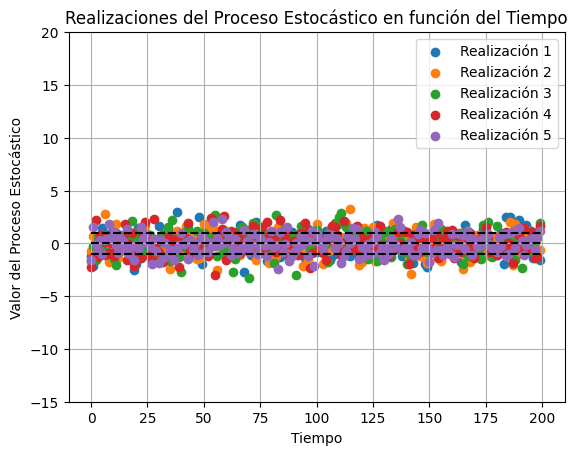

In [24]:
def proceso_estocastico(media, varianza, tamaño_muestra, num_realizaciones):
    # Genera números aleatorios con distribución normal para múltiples realizaciones
    muestras = np.random.normal(loc=media, scale=np.sqrt(varianza), size=(tamaño_muestra, num_realizaciones))
    return muestras

# Parámetros del proceso estocástico
media = 0  # Media del proceso
varianza = 1  # Varianza del proceso
tamaño_muestra = 200  # Tamaño de la muestra
num_realizaciones = 5  # Número de realizaciones del proceso

# Genera las muestras del proceso estocástico
muestras = proceso_estocastico(media, varianza, tamaño_muestra, num_realizaciones)

# Genera secuencia de tiempo
tiempo = np.arange(tamaño_muestra)

# Grafica las realizaciones del proceso estocástico en función del tiempo
for i in range(num_realizaciones):
    plt.scatter(tiempo, muestras[:, i], label=f'Realización {i+1}')

plt.ylim(-15,20)
plt.title('Realizaciones del Proceso Estocástico en función del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Valor del Proceso Estocástico')
plt.legend()
plt.grid(True)
plt.plot([0,tiempo.shape[0]],[media + np.sqrt(varianza),media + np.sqrt(varianza)],'k--')
plt.plot([0,tiempo.shape[0]],[media,media],'k--')
plt.plot([0,tiempo.shape[0]],[media - np.sqrt(varianza),media - np.sqrt(varianza)],'k--')
plt.show()


No caen en el mismo lugar pero tienen una estacionaridad


# Correlación y covarianza

La covarianza define la variación entre dos variables aleatoreas o señales, mientras que la correlación define la relación entre dos variables aleatoreas o señales.


## Correlación
Tengan en cuanta que para realizar la autocorrelación solo debo insertar la misma señal en "np.correlate"

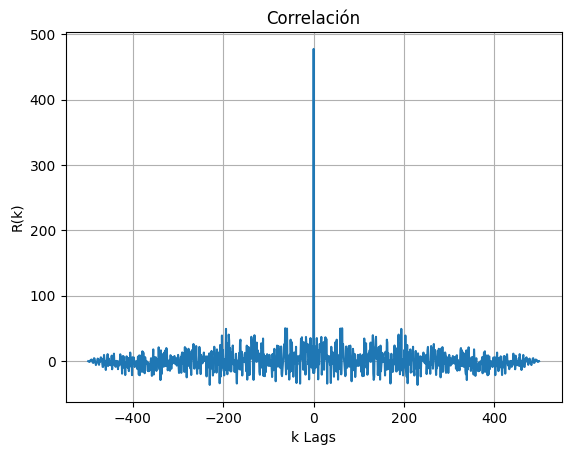

In [25]:
# Generar dos señales aleatorias
np.random.seed(0)  # Fijar semilla para reproducibilidad
muestras = 500  # Número de muestras
señal_1 = np.random.randn(muestras)  # Señal aleatoria 1
señal_2 = np.random.randn(muestras)  # Señal aleatoria 2

# Calcular la autocorrelación en función del lag
lags = np.arange(-muestras + 1, muestras)
correlacion = np.correlate(señal_2, señal_2, mode='full')

# Graficar la autocorrelación en función del lag
plt.plot(lags, correlacion)
plt.title('Correlación')
plt.xlabel('k Lags')
plt.ylabel('R(k)')
plt.grid(True)
plt.show()

##Covarianza
Hacemos los mismo pero quitando la media de las señales.

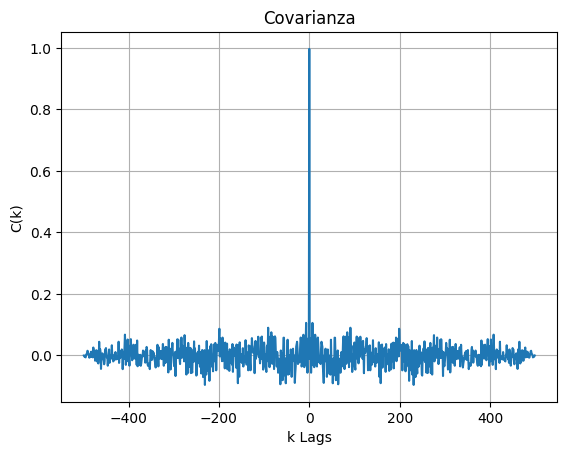

In [6]:
#Calcular la autocovarianza en función del lag
lags = np.arange(-muestras + 1, muestras)
covarianza = np.correlate(señal_1 - np.mean(señal_1), señal_1 - np.mean(señal_1), mode='full')/muestras

# Graficar la autocovarianza en función del lag
plt.plot(lags, covarianza)
plt.title('Covarianza')
plt.xlabel('k Lags')
plt.ylabel('C(k)')
plt.grid(True)
plt.show()

esta normalizado!!!

## funcion "xcorr" para correlación y varianza

El modulo pyplot de matplotlib tiene la función xcorr que devuelve el calculo de la correlación punto a punto y el eje de lags en una sola linea luego se puede graficar y compara los graficos con los anteriores.

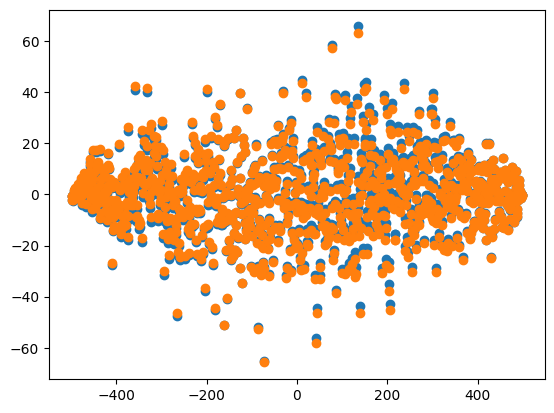

In [26]:
# Calcular la autocorrelación
plt.xcorr(señal_1, señal_2, normed=False, usevlines=False, maxlags=muestras-1)
plt.xcorr((señal_1-np.mean(señal_1)),(señal_2-np.mean(señal_2)),normed=False,usevlines=False, maxlags=muestras-1)
plt.show()


# Señales digitales senoidales, correlación y autocorrelación.

Veamos que sucede cuando aplicacmos la correlación a señales digitales determinísticas

## Señales senoidales deterministicás

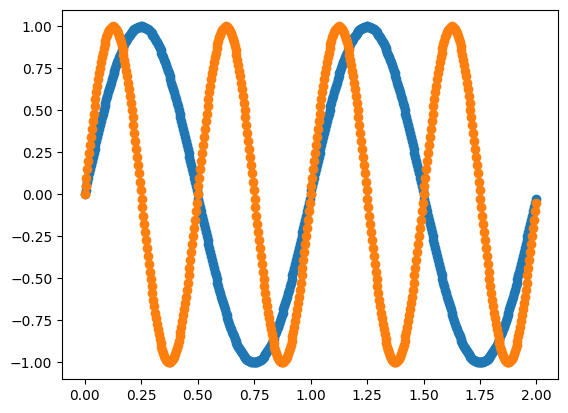

[[ 1.00000000e+00 -3.21305482e-17]
 [-3.21305482e-17  1.00000000e+00]]


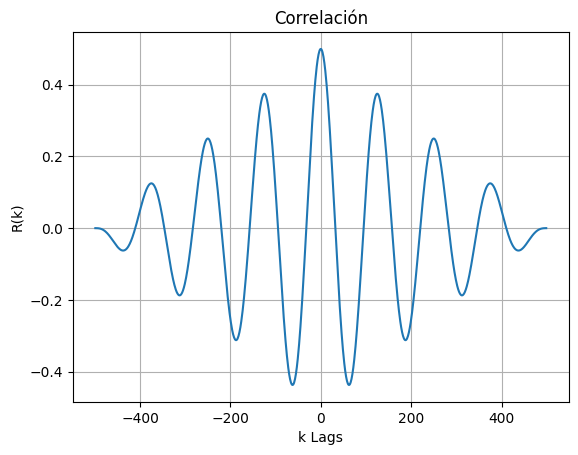

In [8]:
#funcion que calcula señales senoidales
def seno (t,fs):
  y=np.sin(2*np.pi*fs*t)
  return y

t0=0 #tiempo inicial
tn=2 #tiempo final
n=500 #numero de muestras
ts=(tn-t0)/n #tiempo de muestreo ts=1/fs
f1=1 #frecuancias de la señales
f2=2
t=np.arange(0,tn,ts) #eje temporal
m=len(t) #muestras
sig1=np.zeros(m,dtype=float) #señales
sig2=np.zeros(m,dtype=float)

for i in range (0,m):
  sig1[i]=seno(t[i],f1)
  sig2[i]=seno(t[i],f2)
plt.scatter(t,sig1)
plt.scatter(t,sig2)
#plt.ylim()
plt.show()
rxy=np.corrcoef(sig1,sig2) #Coeficientes de correlación de Pearson
print(rxy)

# Calcular la correlación en función del lag
lags = np.arange(-m + 1, m)
correlacion = np.correlate(sig2, sig2, mode='full')/m

# Graficar la autocorrelación en función del lag
plt.plot(lags, correlacion)
plt.title('Correlación')
plt.xlabel('k Lags')
plt.ylabel('R(k)')
plt.grid(True)
plt.show()

Esta es la matriz de autocorrelacion!!
Pearson las hace correr una encimada a la otra, no las va superponiendo poco a poco

Aveces busco patrones de autocorrelacion

Son ortogonales, por eso aparece muy descorrelacionado 

Las señales periodicas tienen que volver al mismo punto 

## Ruido blanco


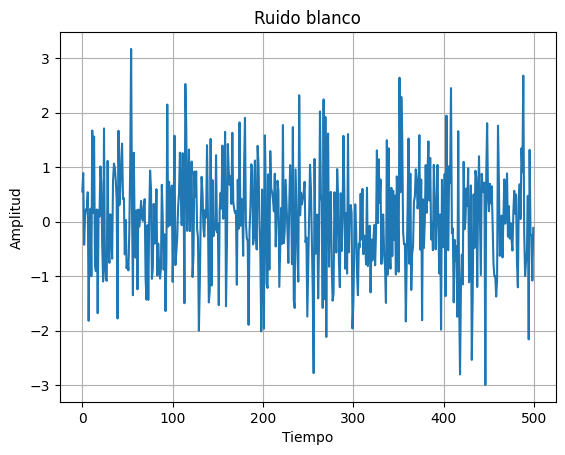

Media y varianza inses -0.0012066317467349953 0.008136148863044741
Media y varianza ses 0.0004266593664011152 0.0016055916787024991


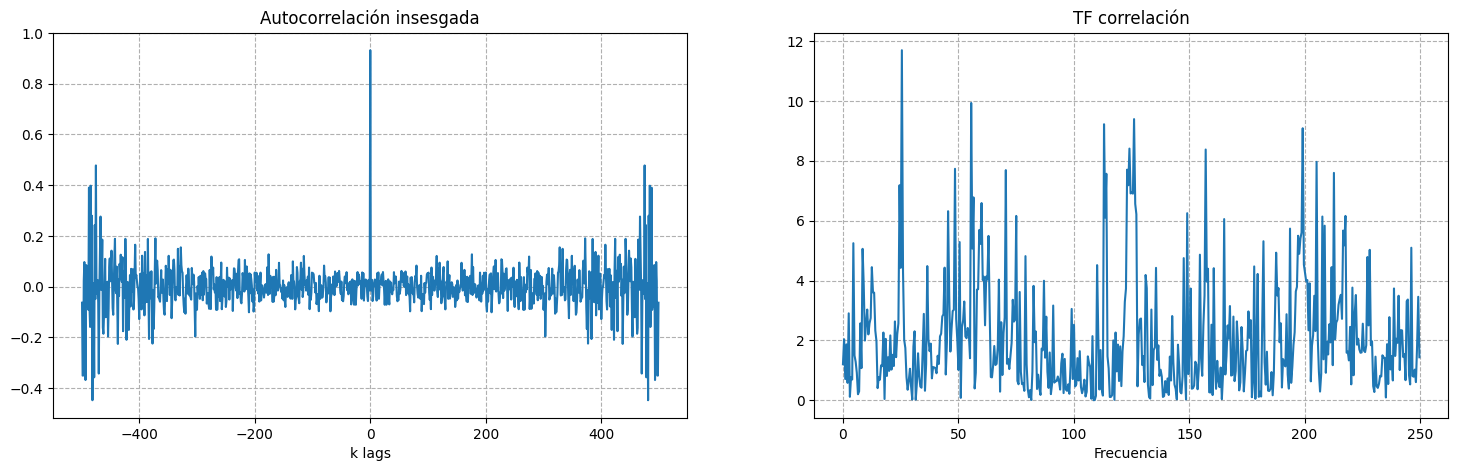

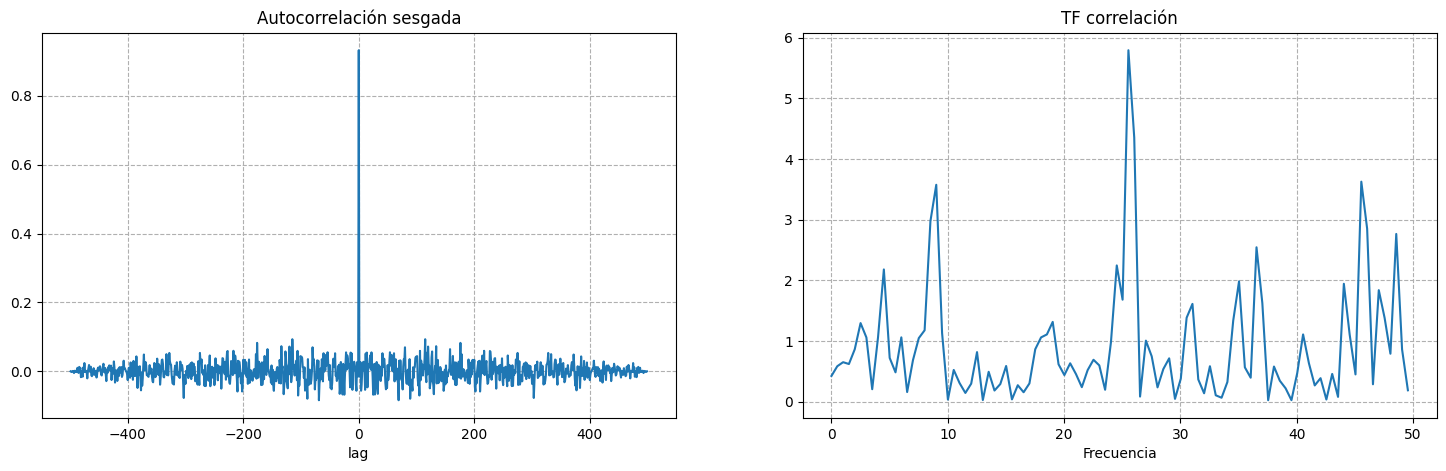

: 

In [27]:
def proceso_estocastico(media, varianza, tamaño_muestra, num_realizaciones):
    # Genera números aleatorios con distribución normal para múltiples realizaciones
    muestras = np.random.normal(loc=media, scale=np.sqrt(varianza), size=(tamaño_muestra, num_realizaciones))
    return muestras

# Parámetros del proceso estocástico
media = 0  # Media del proceso
varianza = 1  # Varianza del proceso
muestras1 = 500  # Tamaño de la muestra
num_realizaciones = 1  # Número de realizaciones del proceso

# Genera las muestras del proceso estocástico
ruido = proceso_estocastico(media, varianza, muestras1, num_realizaciones)

# Genera eje de tiempo
tiempo = np.arange(muestras1)

plt.plot(tiempo, ruido)
plt.title('Ruido blanco')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Calcular la correlación en función del lag
lags = np.arange(-muestras1+1,muestras1)
correlacion = np.correlate(ruido[:,0], ruido[:,0], mode='full')

N=len(ruido[:,0])
Rrr1=np.ndarray(shape=(len(lags)), dtype=float)
for i in lags:
  Rrr1[i,]=correlacion[i,]/(N-np.abs(lags[i])) # Autocorrelción insesgada
# tengo que recorrerla para calcular la autocorrelaccion
Rrr2=correlacion/N # Autocorrelación sesgada

Srr1=fft(Rrr1)         # TF autocorrelcación insesgada
w1=fftfreq(len(Srr1))*N

Srr2=fft(Rrr2)         # TF autocorrelcación sesgada
w2=fftfreq(len(Srr2))*N

# Gráficos inses
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(lags,Rrr1)
ax1.grid(linestyle='--')
ax1.set_title("Autocorrelación insesgada")
ax1.set_xlabel("k lags")
ax2.plot(w1[0:N],np.abs(Srr1[0:N]))
ax2.grid(linestyle='--')
ax2.set_title("TF correlación")
ax2.set_xlabel("Frecuencia")
print('Media y varianza inses', np.mean(Rrr1), np.var(Rrr1))

#Graficos ses
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 5))
ax3.plot(lags,Rrr2)
ax3.grid(linestyle='--')
ax3.set_title("Autocorrelación sesgada")
ax3.set_xlabel("lag")
ax4.plot(w2[0:100],np.abs(Srr2[0:100]))
ax4.grid(linestyle='--')
ax4.set_title("TF correlación")
ax4.set_xlabel("Frecuencia")
print('Media y varianza ses', np.mean(Rrr2), np.var(Rrr2))


## Senales aleatorias

Calculemos correlación y autocorrelación de señales aleatorias.

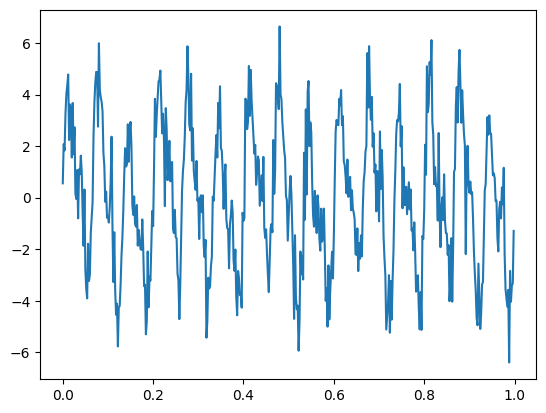

Media y Varianza ses 22.530745997842182 13480.751625102443
Media y Varianza inses 7.260330484654506 0.0


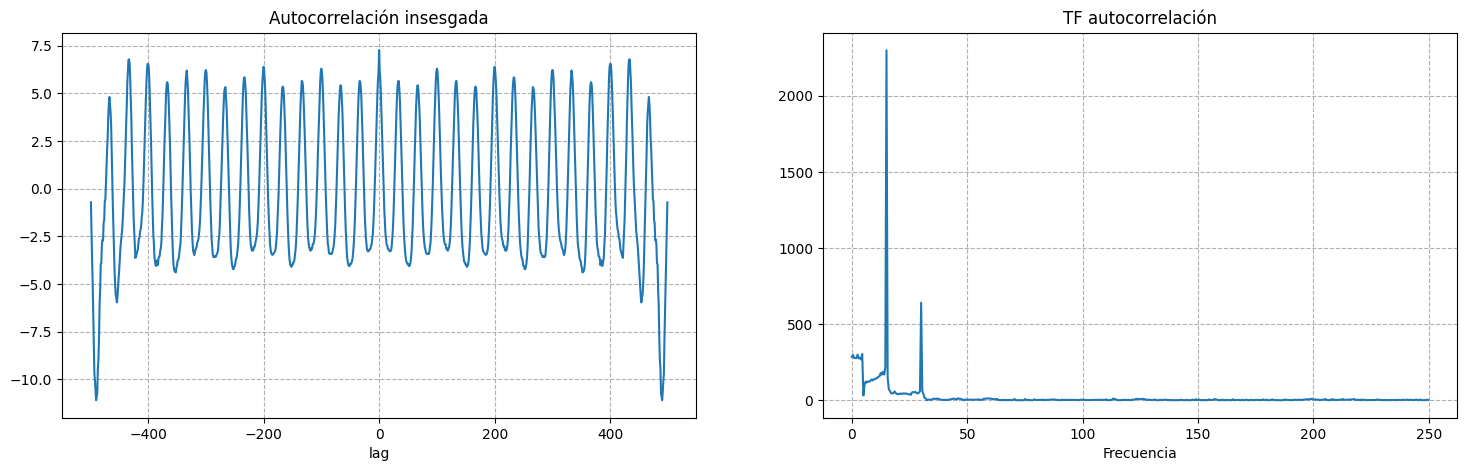

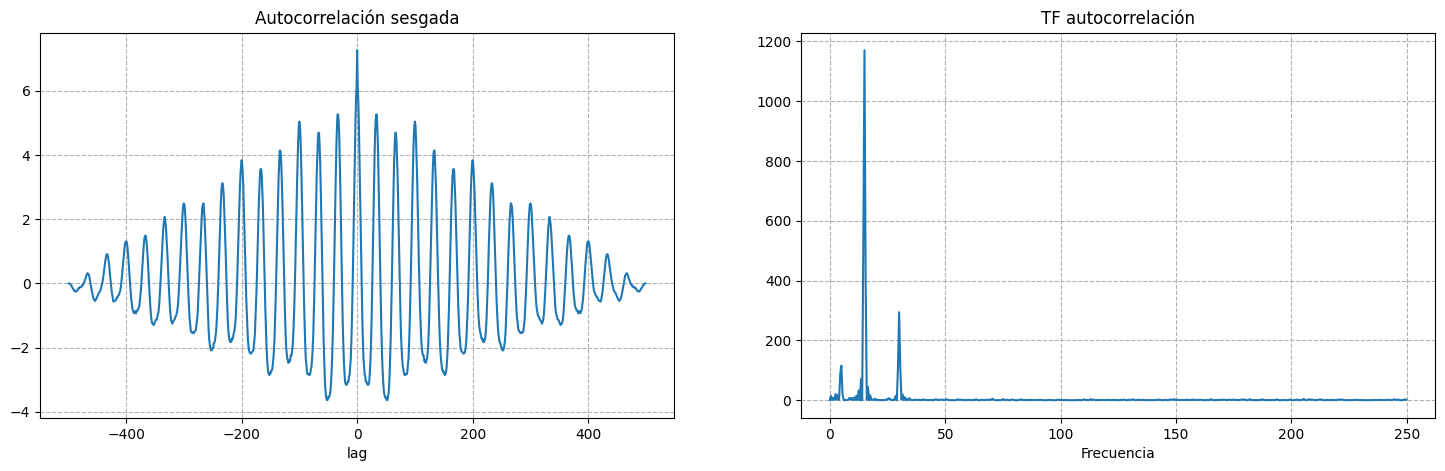

In [10]:
# Estudio autocorrelación y su transformada de fourier para señales aleatoreas
# Funsión para calcular senos
def seno (t,f):
  y=np.sin(2*np.pi*f*t)
  return y

# Parametros
t0=0
tn=1.0
n=500
ts=(tn-t0)/n
f1=5
f2=15
f3=30
t=np.arange(0,tn,ts)
m=len(t)
# Iniciación de señales
sig1=np.zeros(m,dtype=float)
sig2=np.zeros(m,dtype=float)
sig3=np.zeros(m,dtype=float)
# Armado de las señales
for i in range (0,m):
  sig1[i]=seno(t[i],f1)
  sig2[i]=3*seno(t[i],f2)
  sig3[i]=1.5*seno(t[i],f3)

st1=sig1+sig2+sig3+ruido[:,0] # señal aleatoria
plt.plot(t,st1)
plt.show()

l=np.arange(-len(st1)+1,len(st1))
rss=np.correlate(st1,st1,mode='full')
N=len(st1)

Rss1=np.ndarray(shape=(len(l)), dtype=float)
for i in l:
  Rss1[i]=rss[i]/(N-np.abs(l[i])) # Autocorrelción insesgada

Sss1=fft(Rss1) #TF autocorrelación insesgada
w1=fftfreq(len(Sss1))*N # eje de frecuencias

# Graficos inses
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(l,Rss1)
ax1.grid(linestyle='--')
ax1.set_title("Autocorrelación insesgada")
ax1.set_xlabel("lag")
ax2.plot(w1[0:N],np.abs(Sss1[0:N]))
ax2.grid()
ax2.grid(linestyle='--')
ax2.set_title("TF autocorrelación")
ax2.set_xlabel("Frecuencia")
print('Media y Varianza ses',np.mean(np.abs(Sss1)), np.var(np.abs(Sss1)))

Rss2=rss/N  # Autocorrelación sesgada
Sss2=fft(Rss2) #TF autocorrelación
w2=fftfreq(len(Sss2))*N # eje de frecuencias

# Gráficos ses
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 5))
ax3.plot(l,Rss2)
ax3.grid(linestyle='--')
ax3.set_title("Autocorrelación sesgada")
ax3.set_xlabel("lag")
ax4.plot(w2[0:N],np.abs(Sss2[0:N]))
ax4.grid()
ax4.grid(linestyle='--')
ax4.set_title("TF autocorrelación")
ax4.set_xlabel("Frecuencia")
print('Media y Varianza inses', np.mean(np.abs(Sss2)), np.var(np.var(Sss2)))

# Ejercicios Procesos Estocásticos

1-Realice un script emulando un proceso estocastico utilizando la función "numpy.random.randn".

2-Realice un programa que evalue la estacionariedad de un proceso estocástico. Utilice ruido blanco como proceso y demuestre que cumple con las dos condiciones necesarias para ser ESA.

3-Realice una señal de ruido utilizando la función "numpy.random.nromal".

4-Realice correlación y autocorrelaión utilizando la función "numpy.convolve".

# Estimadores espectrales

## Estimadores No-Paramétricos

Son las tecnicas o métodos de estimación de la densidad espectral de potencias basados en el periodograma.

### Periodograma

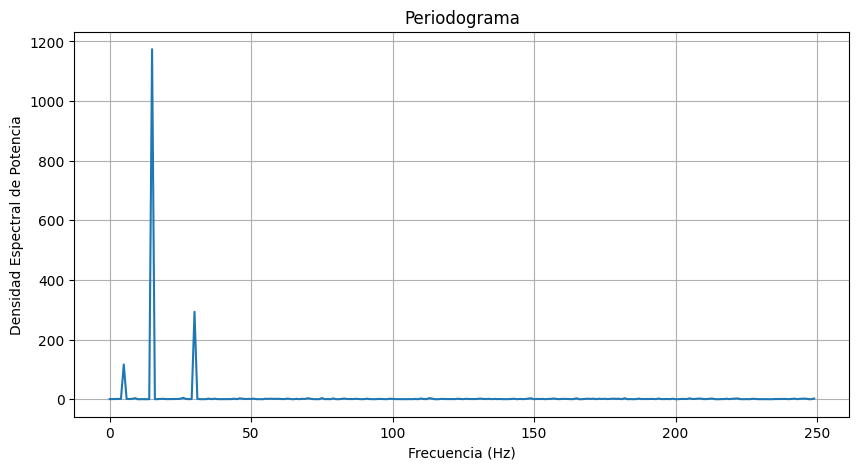

In [11]:
# Calcular el periodograma
periodograma = np.abs(np.fft.fft(st1))**2 / len(st1)

# Calcular la frecuencia correspondiente a cada componente del periodograma
w=fftfreq(len(periodograma))*N

# Graficar el periodograma
plt.figure(figsize=(10, 5))
plt.plot(w[:n // 2], periodograma[:n // 2])
plt.title('Periodograma')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')
plt.grid(True)
plt.show()

### Correlograma

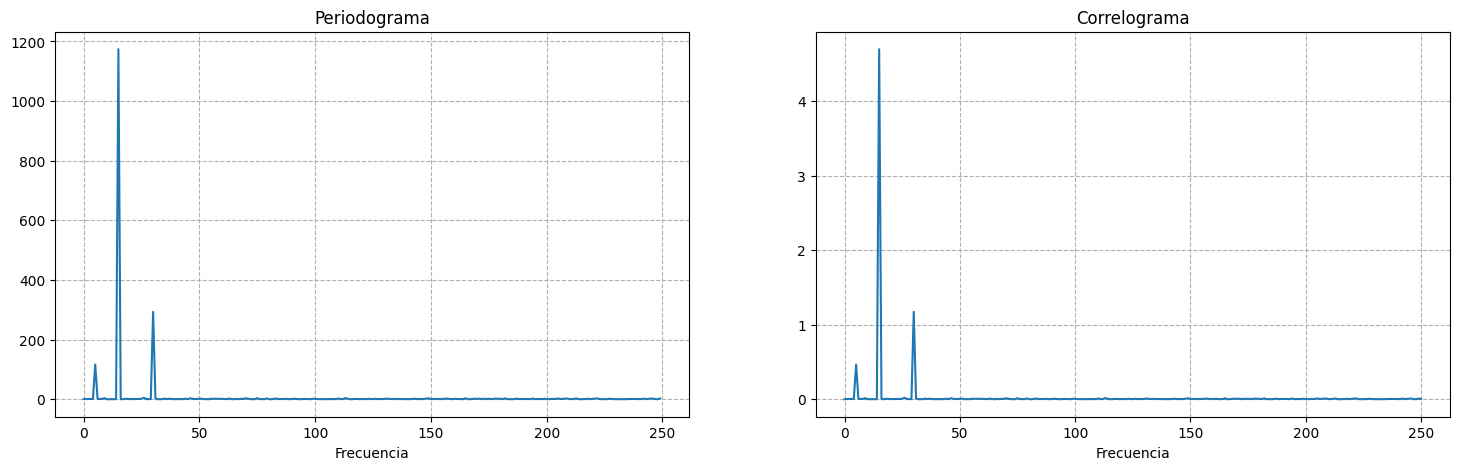

7.260330484654501 5860.5307359913495 Periodograma
0.028922223184224834 0.09339840988301432 Correlograma


In [12]:
nperseg=nfft=n
fre, psd = sig.welch(st1, 1/ts, nperseg=nperseg, nfft=nfft, window='boxcar', noverlap=0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(w[:n//2], periodograma[:n//2])
ax1.grid(linestyle='--')
ax1.set_title("Periodograma")
ax1.set_xlabel("Frecuencia")
ax2.plot(fre,psd)
ax2.grid(linestyle='--')
ax2.set_title("Correlograma")
ax2.set_xlabel("Frecuencia")
plt.show()
print(np.mean((np.abs(periodograma))), np.var(np.abs(periodograma)), 'Periodograma')
print(np.mean((np.abs(psd))), np.var(np.abs(psd)), 'Correlograma')

Periodograma de Bartlett

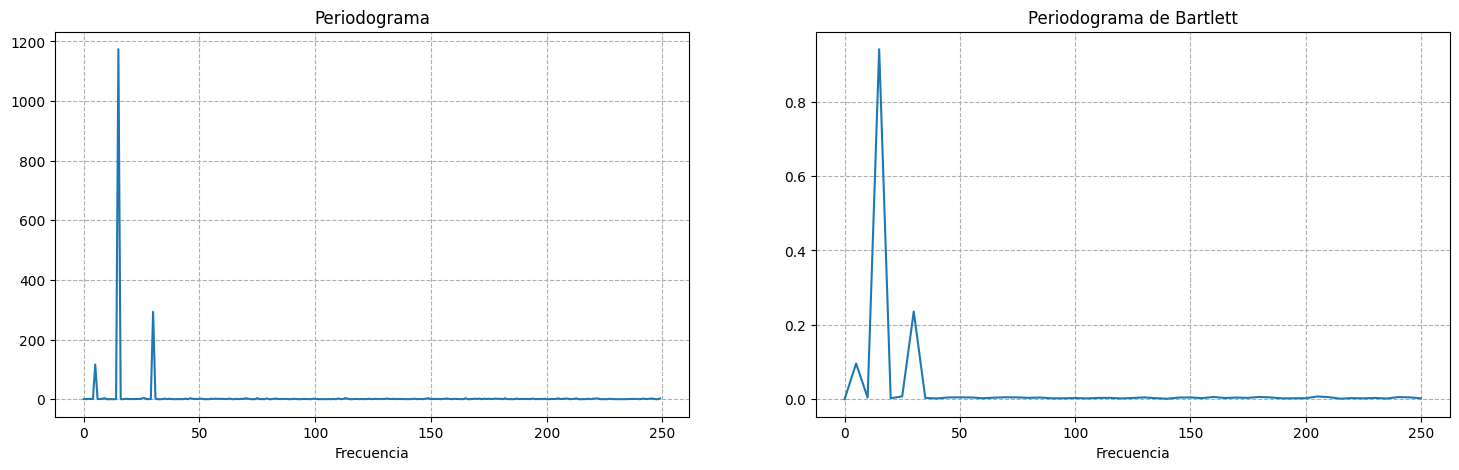

7.260330484654501 5860.5307359913495 Periodograma
0.028440292150870135 0.017830386648131212 Periodograma de Bartlett


In [13]:
nperseg=nfft=n//5
fre1, psd1 = sig.welch(st1, 1/ts, nperseg=nperseg, nfft=nfft, window='boxcar', noverlap=0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(w[:n // 2], periodograma[:n // 2])
ax1.grid(linestyle='--')
ax1.set_title("Periodograma")
ax1.set_xlabel("Frecuencia")
ax2.plot(fre1,psd1)
ax2.grid(linestyle='--')
ax2.set_title("Periodograma de Bartlett")
ax2.set_xlabel("Frecuencia")
plt.show()
print(np.mean((np.abs(periodograma))), np.var(np.abs(periodograma)), 'Periodograma')
print(np.mean((np.abs(psd1))), np.var(np.abs(psd1)), 'Periodograma de Bartlett')

### Periodograma de welch

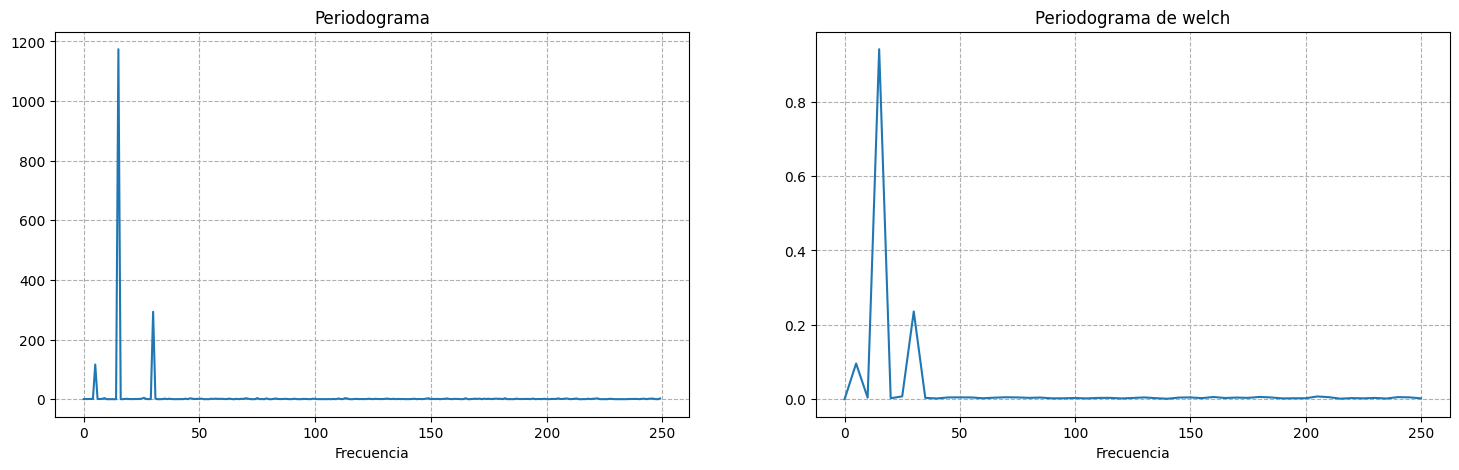

7.260330484654501 5860.5307359913495 Periodograma
0.02987888545169277 0.010492118665984294 Periodograma de Welch


In [14]:
nperseg=nfft=n//5
fre2, psd2 = sig.welch(st1, 1/ts, nperseg=nperseg, nfft=nfft, window='hamming', noverlap=nperseg//2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(w[:n // 2], periodograma[:n // 2])
ax1.grid(linestyle='--')
ax1.set_title("Periodograma")
ax1.set_xlabel("Frecuencia")
ax2.plot(fre1,psd1)
ax2.grid(linestyle='--')
ax2.set_title("Periodograma de welch")
ax2.set_xlabel("Frecuencia")
plt.show()
print(np.mean((np.abs(periodograma))), np.var(np.abs(periodograma)), 'Periodograma')
print(np.mean((np.abs(psd2))), np.var(np.abs(psd2)), 'Periodograma de Welch')

### PSD usando matplotlib

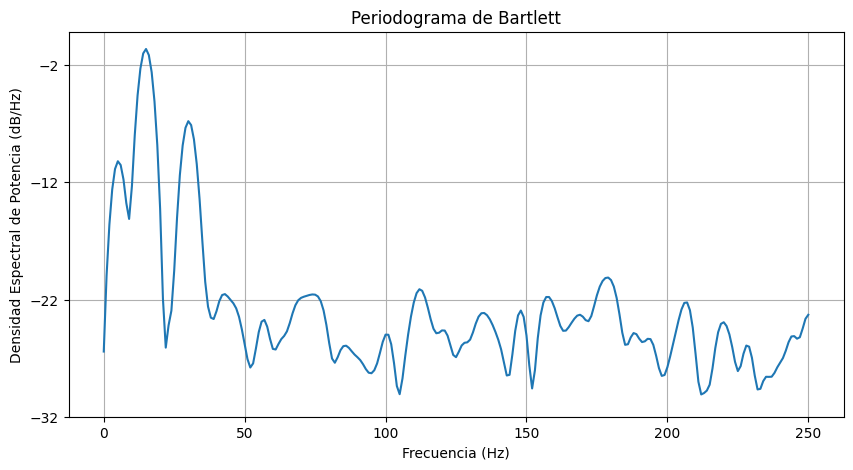

In [15]:
# Calcular y graficar el periodograma de Bartlett
plt.figure(figsize=(10, 5))
plt.psd(st1, NFFT=n//4, Fs=1/ts, window=np.bartlett(n//4), noverlap=0, pad_to=n)
plt.title('Periodograma de Bartlett')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (dB/Hz)')
plt.grid(True)
plt.show()

# Ejercicios de estimadores espectrales

1-Realice una función que obtenga el periodograma de:

a- Blackman-Tukey

b- Bartlett

c- Welch

Sin usar la función "signal.welch" ni "plt.psd"

2-Determinte que ventana es mejor para realizar el periodograma de:

a- Blackman-Tukey

b- Bartlett

c- Welch

Evalue resolución y variabilidad de los espectros de potencia.